<a href="https://colab.research.google.com/github/farhanabrar/MLClass/blob/main/UAS/UAS_ML_cifar100_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt

In [2]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

In [3]:
train_data = CIFAR100(download=True, root="/content", transform=train_transform)
test_data = CIFAR100(root="/content", train=False, transform=test_transform)


  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /content/cifar-100-python.tar.gz to /content


In [4]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[ 2.4495,  2.4300,  2.4495,  ...,  0.5385,  0.2850, -0.0660],
         [ 2.4495,  2.4300,  2.4495,  ...,  0.5190,  0.4800,  0.5385],
         [ 2.4495,  2.4300,  2.4495,  ...,  0.9285,  0.9675,  0.8115],
         ...,
         [ 0.3630,  0.2460,  0.2070,  ..., -1.9381, -1.2556, -1.0411],
         [ 0.4605,  0.5970,  0.5580,  ..., -1.5676, -1.1581, -0.9631],
         [ 0.6750,  0.8115,  1.0260,  ..., -1.0996, -0.9436, -0.6706]],

        [[ 2.5833,  2.5636,  2.5833,  ...,  0.7873,  0.5505,  0.1755],
         [ 2.5833,  2.5636,  2.5833,  ...,  0.5110,  0.6886,  0.8268],
         [ 2.5833,  2.5833,  2.5833,  ...,  0.7478,  1.2018,  1.2215],
         ...,
         [ 1.2018,  1.1426,  1.0833,  ..., -2.1139, -1.2258, -0.9297],
         [ 1.3794,  1.5373,  1.4781,  ..., -1.7784, -1.2653, -0.9692],
         [ 1.5767,  1.7149,  1.8925,  ..., -1.3442, -1.1271, -0.7719]],

        [[ 2.7600,  2.7406,  2.7600,  ...,  0.1069,  0.0294, -0

In [5]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'apple': 500,
 'aquarium_fish': 500,
 'baby': 500,
 'bear': 500,
 'beaver': 500,
 'bed': 500,
 'bee': 500,
 'beetle': 500,
 'bicycle': 500,
 'bottle': 500,
 'bowl': 500,
 'boy': 500,
 'bridge': 500,
 'bus': 500,
 'butterfly': 500,
 'camel': 500,
 'can': 500,
 'castle': 500,
 'caterpillar': 500,
 'cattle': 500,
 'chair': 500,
 'chimpanzee': 500,
 'clock': 500,
 'cloud': 500,
 'cockroach': 500,
 'couch': 500,
 'crab': 500,
 'crocodile': 500,
 'cup': 500,
 'dinosaur': 500,
 'dolphin': 500,
 'elephant': 500,
 'flatfish': 500,
 'forest': 500,
 'fox': 500,
 'girl': 500,
 'hamster': 500,
 'house': 500,
 'kangaroo': 500,
 'keyboard': 500,
 'lamp': 500,
 'lawn_mower': 500,
 'leopard': 500,
 'lion': 500,
 'lizard': 500,
 'lobster': 500,
 'man': 500,
 'maple_tree': 500,
 'motorcycle': 500,
 'mountain': 500,
 'mouse': 500,
 'mushroom': 500,
 'oak_tree': 500,
 'orange': 500,
 'orchid': 500,
 'otter': 500,
 'palm_tree': 500,
 'pear': 500,
 'pickup_truck': 500,
 'pine_tree': 500,
 'plain': 500,
 'pl

In [6]:
test_classes_items = dict()
for test_item in test_data:
    label = test_data.classes[test_item[1]]
    if label not in test_classes_items:
        test_classes_items[label] = 1
    else:
        test_classes_items[label] += 1

test_classes_items

{'apple': 100,
 'aquarium_fish': 100,
 'baby': 100,
 'bear': 100,
 'beaver': 100,
 'bed': 100,
 'bee': 100,
 'beetle': 100,
 'bicycle': 100,
 'bottle': 100,
 'bowl': 100,
 'boy': 100,
 'bridge': 100,
 'bus': 100,
 'butterfly': 100,
 'camel': 100,
 'can': 100,
 'castle': 100,
 'caterpillar': 100,
 'cattle': 100,
 'chair': 100,
 'chimpanzee': 100,
 'clock': 100,
 'cloud': 100,
 'cockroach': 100,
 'couch': 100,
 'crab': 100,
 'crocodile': 100,
 'cup': 100,
 'dinosaur': 100,
 'dolphin': 100,
 'elephant': 100,
 'flatfish': 100,
 'forest': 100,
 'fox': 100,
 'girl': 100,
 'hamster': 100,
 'house': 100,
 'kangaroo': 100,
 'keyboard': 100,
 'lamp': 100,
 'lawn_mower': 100,
 'leopard': 100,
 'lion': 100,
 'lizard': 100,
 'lobster': 100,
 'man': 100,
 'maple_tree': 100,
 'motorcycle': 100,
 'mountain': 100,
 'mouse': 100,
 'mushroom': 100,
 'oak_tree': 100,
 'orange': 100,
 'orchid': 100,
 'otter': 100,
 'palm_tree': 100,
 'pear': 100,
 'pickup_truck': 100,
 'pine_tree': 100,
 'plain': 100,
 'pl

In [7]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


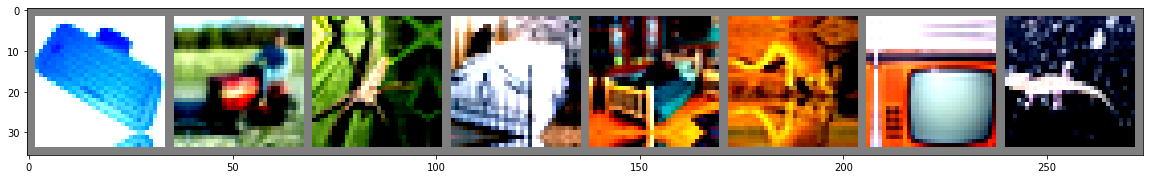

keyboard            lawn_mower          spider              bed                 bed                 kangaroo            television          lizard              


In [8]:
# for 8 images
train_8_samples = DataLoader(train_data, 8, num_workers=4, pin_memory=True, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_8_samples)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print(''.join(f'{train_data.classes[labels[j]]:20s}' for j in range(8)))

In [9]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device
        
    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)
            
    def __len__(self):
        return len(self.data)

In [10]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cuda


In [11]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

In [12]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [13]:
def conv_shortcut(in_channel, out_channel, stride):
    layers = [nn.Conv2d(in_channel, out_channel, kernel_size=(1,1), stride=(stride, stride)),
             nn.BatchNorm2d(out_channel)]
    return nn.Sequential(*layers)

def block(in_channel, out_channel, k_size,stride, conv=False):
    layers = None
    
    first_layers = [nn.Conv2d(in_channel,out_channel[0], kernel_size=(1,1),stride=(1,1)),
                    nn.BatchNorm2d(out_channel[0]),
                    nn.ReLU(inplace=True)]
    if conv:
        first_layers[0].stride=(stride,stride)
    
    second_layers = [nn.Conv2d(out_channel[0], out_channel[1], kernel_size=(k_size, k_size), stride=(1,1), padding=1),
                    nn.BatchNorm2d(out_channel[1])]

    layers = first_layers + second_layers
    
    return nn.Sequential(*layers)
    

class ResNet(BaseModel):
    
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.stg1 = nn.Sequential(
                                   nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3),
                                             stride=(1), padding=1),
                                   nn.BatchNorm2d(64),
                                   nn.ReLU(inplace=True),
                                   nn.MaxPool2d(kernel_size=3, stride=2))
        
        ##stage 2
        self.convShortcut2 = conv_shortcut(64,256,1)
        
        self.conv2 = block(64,[64,256],3,1,conv=True)
        self.ident2 = block(256,[64,256],3,1)

        
        ##stage 3
        self.convShortcut3 = conv_shortcut(256,512,2)
        
        self.conv3 = block(256,[128,512],3,2,conv=True)
        self.ident3 = block(512,[128,512],3,2)

        
        ##stage 4
        self.convShortcut4 = conv_shortcut(512,1024,2)
        
        self.conv4 = block(512,[256,1024],3,2,conv=True)
        self.ident4 = block(1024,[256,1024],3,2)
        
        
        ##Classify
        self.classifier = nn.Sequential(
                                       nn.AvgPool2d(kernel_size=(4)),
                                       nn.Flatten(),
                                       nn.Linear(1024, num_classes))
        
    def forward(self,inputs):
        out = self.stg1(inputs)
        
        #stage 2
        out = F.relu(self.conv2(out) + self.convShortcut2(out))
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)
        
        #stage3
        out = F.relu(self.conv3(out) + (self.convShortcut3(out)))
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        
        #stage4             
        out = F.relu(self.conv4(out) + (self.convShortcut4(out)))
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        
        #Classify
        out = self.classifier(out)#100x1024
        
        return out
        

In [14]:
model = ResNet(3,100)

In [15]:
model = to_device(model, device)

In [16]:
@torch.no_grad()
def evaluate(model,test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

In [17]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, grad_clip=None):
    torch.cuda.empty_cache()
    
    history = []
    
    optimizer = optimizer(model.parameters(), max_lr, weight_decay = weight_decay)
    
    scheduler = scheduler(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))
    
    for epoch in range(epochs):
        model.train()
        
        train_loss = []
        
        lrs = []
        
        for batch in train_dl:
            loss = model.training_step(batch)
            
            train_loss.append(loss)
            
            loss.backward()
            
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs
        
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history

In [18]:
epochs = 100
optimizer = torch.optim.Adam
max_lr = 1e-3
grad_clip = 0.1
weight_decay = 1e-5
scheduler = torch.optim.lr_scheduler.OneCycleLR

In [19]:
%%time
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model, 
              optimizer=optimizer, max_lr=max_lr, grad_clip=grad_clip,
              weight_decay=weight_decay, scheduler=torch.optim.lr_scheduler.OneCycleLR)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00004, train_loss: 3.8882, val_loss: 4.0885, val_acc: 0.0690
Epoch [1], last_lr: 0.00005, train_loss: 3.2250, val_loss: 3.9202, val_acc: 0.1080
Epoch [2], last_lr: 0.00006, train_loss: 2.8995, val_loss: 3.7595, val_acc: 0.1396
Epoch [3], last_lr: 0.00008, train_loss: 2.6441, val_loss: 3.3755, val_acc: 0.1913
Epoch [4], last_lr: 0.00010, train_loss: 2.4513, val_loss: 3.3395, val_acc: 0.2099
Epoch [5], last_lr: 0.00013, train_loss: 2.3065, val_loss: 3.0687, val_acc: 0.2306
Epoch [6], last_lr: 0.00016, train_loss: 2.1825, val_loss: 2.9561, val_acc: 0.2580
Epoch [7], last_lr: 0.00020, train_loss: 2.0817, val_loss: 2.9417, val_acc: 0.2703
Epoch [8], last_lr: 0.00024, train_loss: 1.9940, val_loss: 2.7076, val_acc: 0.3083
Epoch [9], last_lr: 0.00028, train_loss: 1.9250, val_loss: 2.4491, val_acc: 0.3585
Epoch [10], last_lr: 0.00032, train_loss: 1.8515, val_loss: 2.3955, val_acc: 0.3723
Epoch [11], last_lr: 0.00037, train_loss: 1.7879, val_loss: 2.3129, val_acc: 0.3904
Ep

In [20]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])
    
def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

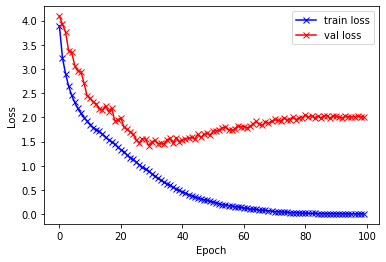

In [21]:
plot_loss(history)

In [22]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_data.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: mountain , Predicted: road


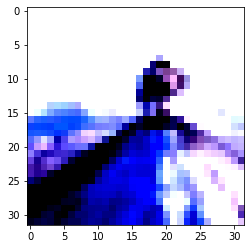

In [23]:
img, label = test_data[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: wardrobe , Predicted: wardrobe


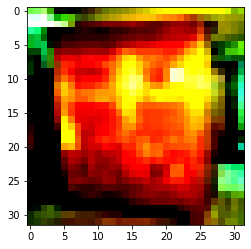

In [24]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: crab , Predicted: crab


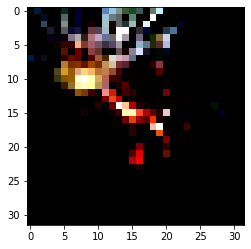

In [25]:
img, label = test_data[100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))